# Logistic Regression with the Iris Dataset

For more explanation of logistic regression, see
1. [Our course notes](https://jennselby.github.io/MachineLearningCourseNotes/#binomial-logistic-regression)
1. [This scikit-learn explanation](http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)
1. [The full scikit-learn documentation of the LogisticRegression model class](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

## Instructions
0. If you haven't already, follow [the setup instructions here](https://jennselby.github.io/MachineLearningCourseNotes/#setting-up-python3) to get all necessary software installed.
0. Read through the code in the following sections
  * [Iris Dataset](#Iris-Dataset)
  * [Visualization](#Visualization)
  * [Model Training](#Model-Training)
  * [Prediction](#Prediction)
0. Complete at least one of the following exercises
  * [Exercise Option #1 - Standard Difficulty](#Exercise-Option-#1---Standard-Difficulty)
  * [Exercise Option #2 - Advanced Difficulty](#Exercise-Option-#2---Advanced-Difficulty)

In [10]:
from sklearn import linear_model # for fitting our model
from sklearn.datasets import load_iris # the iris dataset is included in scikit-learn

# force numpy not to use scientific notation, to make it easier to read the numbers the program prints out
import numpy as np 


# to display graphs in this notebook
%matplotlib inline
import matplotlib.pyplot as plt

## Iris Dataset

Before you go on, make sure you understand this dataset. Modify the cell below to examine different parts of the dataset that are contained in the 'iris' dictionary object.

What are the features? What are we trying to classify?

In [11]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

You can also try looking at it using a [pandas dataframe](https://jennselby.github.io/MachineLearningCourseNotes/#pandas).

In [12]:
import pandas
iris_df = pandas.DataFrame(iris.data)
iris_df.columns = iris.feature_names
iris_df['target'] = [iris.target_names[target] for target in iris.target]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


For this tutorial, at least to start, we're not going to use the whole dataset, just because it is easier to visualize two features than four. The code below decides which two features we're going to use.

We'll also need to know at what location in the list each of the classes start at.

In [33]:
# Use just two columns (the first and fourth in this case).
x1_feature = 0
x2_feature = 3
iris_inputs = iris.data[:,[x1_feature,x2_feature]]

# The data are in order by class. Find out where the other classes start in the list
start_class_one = list(iris.target).index(1)
start_class_two = list(iris.target).index(2)

## Visualization

Let's visualize our dataset, so that we can better understand what it looks like.

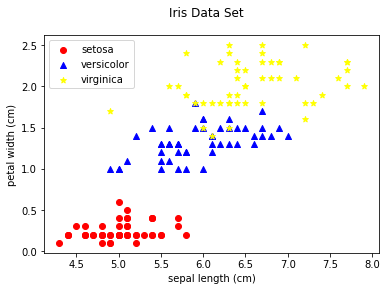

In [34]:
# split the two inputs into single dimensional arrays for plotting
x1 = iris_inputs[:,0]
x2 = iris_inputs[:,1]

# create a figure and label it
fig = plt.figure()
fig.suptitle('Iris Data Set')
plt.xlabel(iris.feature_names[x1_feature])
plt.ylabel(iris.feature_names[x2_feature])

# put the input data on the graph, with different colors and shapes for each type
scatter_0 = plt.scatter(x1[:start_class_one], x2[:start_class_one],
                                      c="red", marker="o", label=iris.target_names[0])
scatter_1 = plt.scatter(x1[start_class_one:start_class_two], x2[start_class_one:start_class_two],
                                      c="blue", marker="^", label=iris.target_names[1])
scatter_2 = plt.scatter(x1[start_class_two:], x2[start_class_two:],
                                      c="yellow", marker="*", label=iris.target_names[2])

# add a legend to explain which points are which
plt.legend(handles=[scatter_0, scatter_1, scatter_2])

# show the graph
plt.show()

## Model Training

Next, we want to fit our logistic regression model to the subset of the data we're using.

In [35]:
model = linear_model.LogisticRegression()
model.fit(iris_inputs, iris.target)

print('Intercept: {0}  Coefficients: {1}'.format(model.intercept_, model.coef_))

Intercept: [ 10.71081419  -0.10484162 -10.60597257]  Coefficients: [[-1.19282061 -3.80674934]
 [ 0.27892882 -0.07151506]
 [ 0.9138918   3.8782644 ]]


## Prediction

Now we can make some predictions using the trained model. We'll pull out some examples from our training data and see what the model says about them.

In [36]:
# Use the first input from each class
inputs = [iris_inputs[0], iris_inputs[start_class_one], iris_inputs[start_class_two]]

print('Class predictions: {0}'.format(model.predict(inputs))) # guess which class
print('Probabilities:\n{0}'.format(model.predict_proba(inputs))) # give probability of each class

# 0.928318572 0.0715708661 0.000110562340

Class predictions: [0 1 2]
Probabilities:
[[9.28318572e-01 7.15708661e-02 1.10562340e-04]
 [5.59651562e-03 6.25194233e-01 3.69209251e-01]
 [1.36503962e-05 3.31308395e-02 9.66855510e-01]]


# Exercise Option #1 - Standard Difficulty

Answer the following questions. You can also use the graph below, if seeing the data visually helps you understand the data.
1. What should we be expecting as the output for class predictions in the above cell? If the model is not giving the expected output, what are some of the reasons it might not be?
1. How do the probabilities output by the above cell relate to the class predictions? Why do you think the model might be more or less confident in its predictions?
1. Looking at the intercept and coefficient output further above, if a coefficient is negative, what has the model learned about this feature? In other words, if you took a datapoint and you increased the value of a feature that has a negative coefficient, what would you expect to happen to the probabilities the model gives this datapoint?
1. Do these two features allow you to predict the iris type well? How do you know? Explain using both the text output in the cells above and the graph below.
1. Try a different pair of features. Do these allow you to predict the iris type well? How do you know?

---
1. we don't provide labels for the classes, so it should just be outputting [0 1 2] 
2. the probabilities are ordered according to the class predictions. The model's confidence should go up as the overlap between features of classes decreases.
3. negative coefficients mean that the feature they are applied to decreases the probability of the dependent variable -- in this case, that would be belonging to a given class. 
4. these features work well to predict the iris type. The probabilities given have one high probability, and two low ones. This means that the model is relatively confident. The model, however, does struggle with class 0.
5. features sepal width and petal length make the model perform better with classes 0 and 2, but worse with class 1.

# Exercise Option #2 - Advanced Difficulty

The plot above is only showing the data, and not anything about what the model learned. Come up with some ideas for how to show the model fit and implement one of them in code. Remember, we are here to help if you are not sure how to write the code for your ideas!

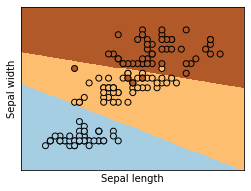

In [41]:
# Citation: documentation --
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html#sphx-glr-auto-examples-linear-model-plot-iris-logistic-py

X = iris_inputs
Y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()